In [61]:
import re
import scipy
import string
import pickle
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from prettytable import PrettyTable
from astropy.table import Table, Column
from sklearn.metrics import accuracy_score

In [62]:
train= pd.read_csv('D:/datamining/train.csv')
test= pd.read_csv('D:/datamining/test.csv')

In [63]:
train.columns

Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')

In [64]:
train.shape[0]

6

In [65]:
train

,height,weight,hair,beard,scarf,gender
0,180.3000,196,bald,yes,no,male
1,170.0000,120,long,no,no,female
2,178.5000,200,short,no,no,male
3,163.4000,110,medium,no,yes,female
4,175.2222,220,short,yes,no,male
5,165.0000,150,medium,no,yes,female


In [66]:
train.columns.name='index'

In [67]:
train

index,height,weight,hair,beard,scarf,gender
0,180.3000,196,bald,yes,no,male
1,170.0000,120,long,no,no,female
2,178.5000,200,short,no,no,male
3,163.4000,110,medium,no,yes,female
4,175.2222,220,short,yes,no,male
5,165.0000,150,medium,no,yes,female


In [68]:
test

,height,weight,hair,beard,scarf,gender
0,179.1,185,long,yes,no,male
1,160.5,130,short,no,no,female
2,177.8,160,bald,no,no,male
3,161.1,100,medium,no,no,female


In [69]:
test.columns.name='index'

In [70]:
test

index,height,weight,hair,beard,scarf,gender
0,179.1,185,long,yes,no,male
1,160.5,130,short,no,no,female
2,177.8,160,bald,no,no,male
3,161.1,100,medium,no,no,female


In [71]:
trainM = train[train['gender']=='male']

In [72]:
trainM

index,height,weight,hair,beard,scarf,gender
0,180.3000,196,bald,yes,no,male
2,178.5000,200,short,no,no,male
4,175.2222,220,short,yes,no,male


In [73]:
trainM.shape[0]

3

In [74]:
trainF = train[train['gender']=='female']

In [75]:
trainF

index,height,weight,hair,beard,scarf,gender
1,170.0,120,long,no,no,female
3,163.4,110,medium,no,yes,female
5,165.0,150,medium,no,yes,female


In [76]:
testM = test[test['gender']=='male']

In [77]:
testF = test[test['gender']=='female']

In [78]:
testF

index,height,weight,hair,beard,scarf,gender
1,160.5,130,short,no,no,female
3,161.1,100,medium,no,no,female


In [79]:
testM

index,height,weight,hair,beard,scarf,gender
0,179.1,185,long,yes,no,male
2,177.8,160,bald,no,no,male


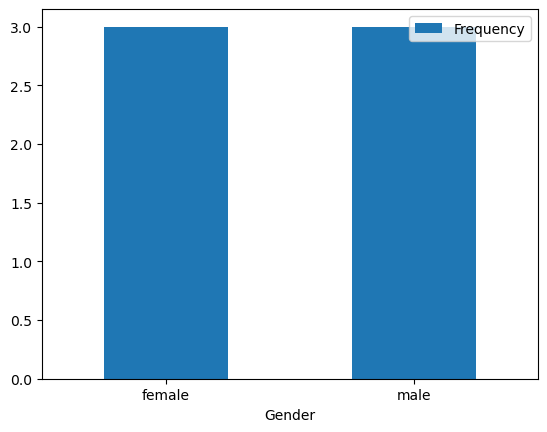

In [80]:
grph = train.groupby('gender')['gender'].count().plot(kind='bar', rot=0)
grph.set(xlabel="Gender")
grph.legend(["Frequency"], loc='upper right')


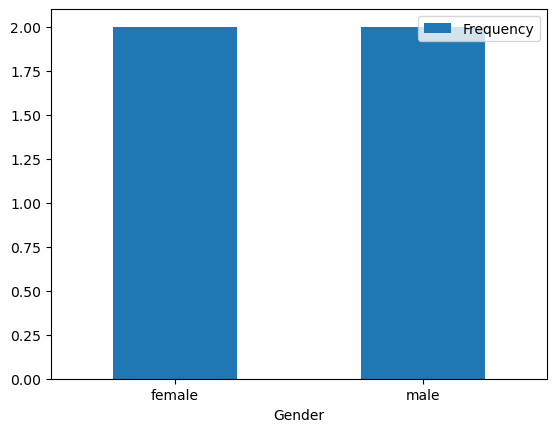

In [81]:
grph2 = test.groupby('gender')['gender'].count().plot(kind='bar', rot=0)
grph2.set(xlabel="Gender")
grph2.legend(["Frequency"], loc='upper right')

<AxesSubplot:xlabel='hair'>

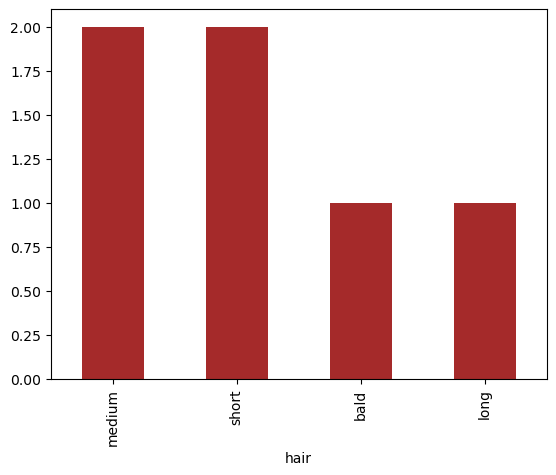

In [82]:
train.groupby('hair')['hair'].count().sort_values(ascending=False).plot(kind='bar', color='brown')

<AxesSubplot:xlabel='hair'>

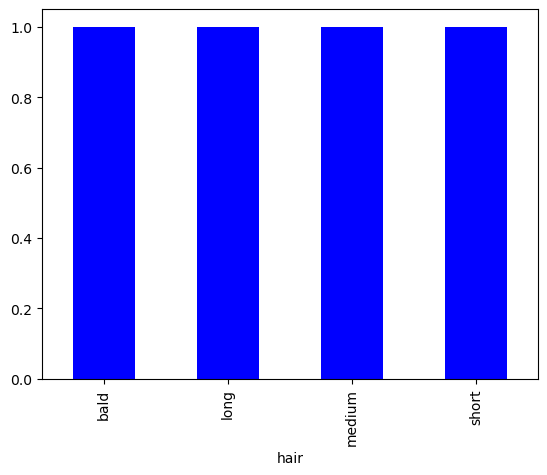

In [83]:
test.groupby('hair')['hair'].count().sort_values(ascending=False).plot(kind='bar', color='blue')

<AxesSubplot:xlabel='beard'>

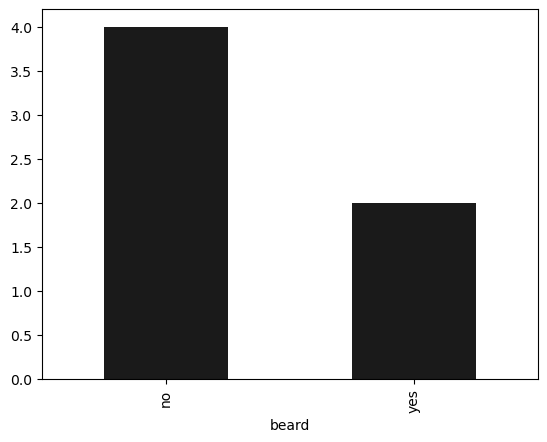

In [84]:
train.groupby('beard')['beard'].count().plot(kind='bar', colormap='RdGy_r')

<AxesSubplot:xlabel='beard'>

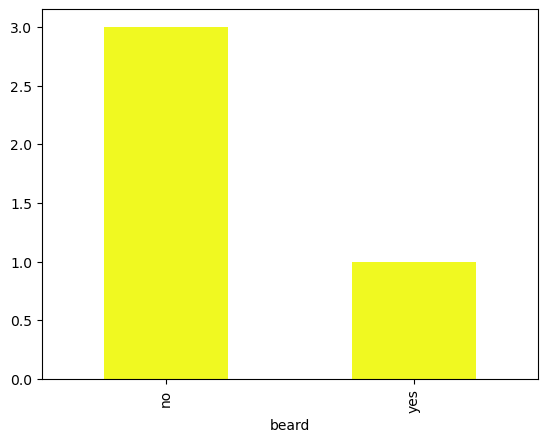

In [85]:
test.groupby('beard')['beard'].count().plot(kind='bar', colormap='plasma_r')

In [86]:
train = train.fillna('')
ptrain= train.round({'height':2})

In [87]:
def print_side_by_side(*objs, **kwds):

    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 15)
    reprs = [repr(obj).split('\n') for obj in objs]
    print(adjoin(space, *reprs))

In [88]:
print_side_by_side(train, ptrain)

index    height  weight    hair beard scarf  gender               index  height  weight    hair beard scarf  gender
0      180.3000     196    bald   yes    no    male               0      180.30     196    bald   yes    no    male
1      170.0000     120    long    no    no  female               1      170.00     120    long    no    no  female
2      178.5000     200   short    no    no    male               2      178.50     200   short    no    no    male
3      163.4000     110  medium    no   yes  female               3      163.40     110  medium    no   yes  female
4      175.2222     220   short   yes    no    male               4      175.22     220   short   yes    no    male
5      165.0000     150  medium    no   yes  female               5      165.00     150  medium    no   yes  female


In [89]:
test = test.fillna('')
ptest = test.round({'height':2})

In [90]:
print_side_by_side(test, ptest)

index  height  weight    hair beard scarf  gender               index  height  weight    hair beard scarf  gender
0       179.1     185    long   yes    no    male               0       179.1     185    long   yes    no    male
1       160.5     130   short    no    no  female               1       160.5     130   short    no    no  female
2       177.8     160    bald    no    no    male               2       177.8     160    bald    no    no    male
3       161.1     100  medium    no    no  female               3       161.1     100  medium    no    no  female


In [91]:
leg = LabelEncoder()
les= LabelEncoder()
leh = LabelEncoder()
leb = LabelEncoder()

In [92]:
gender = ['male', 'female']
scarf = ['yes', 'no']
beard = ['yes', 'no']
hairLen = ['bald', 'long', 'short', 'medium']

In [93]:
leg.fit(gender)
les.fit(scarf)
leh.fit(hairLen)
leb.fit(beard)

LabelEncoder()

In [94]:
letrain = ptrain.copy(deep=True)
letest = ptest.copy(deep=True)

In [95]:
letrain['gender'] = leg.transform(ptrain['gender'])

In [96]:
ptrain['evg'] = letrain['gender']

In [97]:
ptrain[['gender', 'evg']]

index,gender,evg
0,male,1
1,female,0
2,male,1
3,female,0
4,male,1
5,female,0


In [98]:
letrain['beard'] = leb.transform(ptrain['beard'])

In [99]:
ptrain['evb'] = letrain['beard']

In [100]:
ptrain[['beard','evb' ]]

index,beard,evb
0,yes,1
1,no,0
2,no,0
3,no,0
4,yes,1
5,no,0


In [101]:
letrain['hair'] = leh.transform(ptrain['hair'])

In [102]:
ptrain['evh'] = letrain['hair']

In [103]:
ptrain[['hair', 'evh']]

index,hair,evh
0,bald,0
1,long,1
2,short,3
3,medium,2
4,short,3
5,medium,2


In [104]:
letrain['scarf'] = les.transform(ptrain['scarf'])

In [105]:
ptrain['evs'] = letrain['scarf']

In [106]:
ptrain[['scarf', 'evs']]

index,scarf,evs
0,no,0
1,no,0
2,no,0
3,yes,1
4,no,0
5,yes,1


In [107]:
letest['gender'] = leg.transform(ptest['gender']) 
letest['hair'] = leh.transform(ptest['hair']) 
letest['beard'] = leb.transform(ptest['beard']) 
letest['scarf'] = les.transform(ptest['scarf']) 

In [108]:
print_side_by_side(letrain, train)

index  height  weight  hair  beard  scarf  gender               index    height  weight    hair beard scarf  gender
0      180.30     196     0      1      0       1               0      180.3000     196    bald   yes    no    male
1      170.00     120     1      0      0       0               1      170.0000     120    long    no    no  female
2      178.50     200     3      0      0       1               2      178.5000     200   short    no    no    male
3      163.40     110     2      0      1       0               3      163.4000     110  medium    no   yes  female
4      175.22     220     3      1      0       1               4      175.2222     220   short   yes    no    male
5      165.00     150     2      0      1       0               5      165.0000     150  medium    no   yes  female


In [109]:
print_side_by_side(test, letest)

index  height  weight    hair beard scarf  gender               index  height  weight  hair  beard  scarf  gender
0       179.1     185    long   yes    no    male               0       179.1     185     1      1      0       1
1       160.5     130   short    no    no  female               1       160.5     130     3      0      0       0
2       177.8     160    bald    no    no    male               2       177.8     160     0      0      0       1
3       161.1     100  medium    no    no  female               3       161.1     100     2      0      0       0


In [110]:
tf = ['height', 'weight', 'hair', 'beard', 'scarf']
tar = 'gender'

In [111]:
xtrain = letrain.loc[:, tf]
ytrain = letrain.loc[:, tar]

In [112]:
xtest = letest.loc[:, tf]
ytest = letest.loc[:, tar]

In [115]:
mnames = []
lr = LogisticRegression()

In [116]:
lr.fit(xtrain, np.ravel(ytrain))
mnames.append('LogisticRegression')

In [118]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, np.ravel(ytrain))
mnames.append("RandomForestClassifier")

In [119]:
lsvc = LinearSVC()
lsvc.fit(xtrain, np.ravel(ytrain))
mnames.append('LinearSVC')

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [121]:
bnb = BernoulliNB()
bnb.fit(xtrain,np.ravel(ytrain))
mnames.append('BernoulliNB')

In [124]:
acuracy = []
yprdct = lr.predict(xtest)
acuraci = round(accuracy_score(ytest, yprdct), 2)

In [125]:
itv = leg.inverse_transform(yprdct)

In [128]:
print(ptest.assign(predicted_gender = itv))
print("\n\nAccuracy score : ", acuraci)
acuracy.append(acuraci)

index  height  weight    hair beard scarf  gender predicted_gender
0       179.1     185    long   yes    no    male             male
1       160.5     130   short    no    no  female           female
2       177.8     160    bald    no    no    male           female
3       161.1     100  medium    no    no  female           female


Accuracy score :  0.75


In [131]:
yprdct = rfc.predict(xtest)
acuraci = round(accuracy_score(ytest, yprdct), 2)
itv = leg.inverse_transform(yprdct)
print(ptest.assign(predicted_gender = itv))
print("\n\nAccuracy score : ", acuraci)
acuracy.append(acuraci)

index  height  weight    hair beard scarf  gender predicted_gender
0       179.1     185    long   yes    no    male             male
1       160.5     130   short    no    no  female           female
2       177.8     160    bald    no    no    male             male
3       161.1     100  medium    no    no  female           female


Accuracy score :  1.0


In [132]:
yprdct = lsvc.predict(xtest)
acuraci = round(accuracy_score(ytest, yprdct), 2)
itv = leg.inverse_transform(yprdct)
print(ptest.assign(predicted_gender = itv))
print("\n\nAccuracy score : ", acuraci)
acuracy.append(acuraci)

index  height  weight    hair beard scarf  gender predicted_gender
0       179.1     185    long   yes    no    male             male
1       160.5     130   short    no    no  female           female
2       177.8     160    bald    no    no    male           female
3       161.1     100  medium    no    no  female           female


Accuracy score :  0.75


In [133]:
yprdct = bnb.predict(xtest)
acuraci = round(accuracy_score(ytest, yprdct), 2)
itv = leg.inverse_transform(yprdct)
print(ptest.assign(predicted_gender = itv))
print("\n\nAccuracy score : ", acuraci)
acuracy.append(acuraci)

index  height  weight    hair beard scarf  gender predicted_gender
0       179.1     185    long   yes    no    male             male
1       160.5     130   short    no    no  female           female
2       177.8     160    bald    no    no    male             male
3       161.1     100  medium    no    no  female           female


Accuracy score :  1.0


In [142]:
print('\n\nDetailed Performance of all the models.')
print("==========================\n")
ast = PrettyTable(['Model','Accuracy'])
maximum = 0
for i in range(0, 4):
    model = mnames[i]
    score = acuracy[i] 
    if(maximum <= score):
        maximum = score
        index = i
    ast.add_row([model,score])
print(ast)
highest_accuracy = PrettyTable(['Model', 'Accuracy'])
highest_accuracy.add_row([mnames[index], acuracy[index]])
print(highest_accuracy)




Detailed Performance of all the models.

+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
|   LogisticRegression   |   0.75   |
| RandomForestClassifier |   1.0    |
|       LinearSVC        |   0.75   |
|      BernoulliNB       |   1.0    |
+------------------------+----------+
+-------------+----------+
|    Model    | Accuracy |
+-------------+----------+
| BernoulliNB |   1.0    |
+-------------+----------+


In [143]:
print("\nTrain Dataset Features in form of Dataframe:", 
"\t\t", " Test Dataset Features in form of Dataframe:")
print("============","\t\t"," ============\n")
print_side_by_side(letrain, letest)


Train Dataset Features in form of Dataframe: 		  Test Dataset Features in form of Dataframe:
============ 		  ============

index  height  weight  hair  beard  scarf  gender               index  height  weight  hair  beard  scarf  gender
0      180.30     196     0      1      0       1               0       179.1     185     1      1      0       1
1      170.00     120     1      0      0       0               1       160.5     130     3      0      0       0
2      178.50     200     3      0      0       1               2       177.8     160     0      0      0       1
3      163.40     110     2      0      1       0               3       161.1     100     2      0      0       0
4      175.22     220     3      1      0       1                                                                
5      165.00     150     2      0      1       0                                                                


In [146]:
cdata = pd.concat([letrain, letest])
print("\n\n\nAll Train and Test Dataset Features in form of DataFrame:")
print(cdata)




All Train and Test Dataset Features in form of DataFrame:
index  height  weight  hair  beard  scarf  gender
0      180.30     196     0      1      0       1
1      170.00     120     1      0      0       0
2      178.50     200     3      0      0       1
3      163.40     110     2      0      1       0
4      175.22     220     3      1      0       1
5      165.00     150     2      0      1       0
0      179.10     185     1      1      0       1
1      160.50     130     3      0      0       0
2      177.80     160     0      0      0       1
3      161.10     100     2      0      0       0


In [148]:
allx = cdata.loc[:, tf]
ally = cdata.loc[:, tar]

In [149]:
rfc.fit(allx, np.ravel(ally))

RandomForestClassifier()

In [150]:
pickle.dump(rfc, open('rfc.pkl', 'wb'))

In [152]:
classifier = pickle.load(open('rfc.pkl', 'rb'))

In [168]:
height = float(input("Please enter your Height here (centimeter): ").strip())
weight = int(input("Please enter your Weight here (kg):").strip())
hair = input("Please enter your Hair Length here (Bald/Long/Short/Medium): ").strip()
beard = input("Do you have beard? (Yes/No): ").strip()
scarf = input("Do you wear Scarf? (Yes/No): ").strip()

Please enter your Height here (centimeter): 196.235
Please enter your Weight here (kg):93
Please enter your Hair Length here (Bald/Long/Short/Medium): bald
Do you have beard? (Yes/No): yes
Do you wear Scarf? (Yes/No): yes


In [169]:
uid = pd.DataFrame({'height':[height], 'weight':[weight],'hair': [hair],'beard': [beard],'scarf': [scarf]})
uid = uid[['height', 'weight','hair','beard','scarf']]

In [170]:
uid

,height,weight,hair,beard,scarf
0,196.235,93,bald,yes,yes


In [171]:
uid['scarf']=les.transform(uid['scarf'])
uid['beard']=leb.transform(uid['beard'])
uid['hair']=leh.transform(uid['hair'])
print("\n\n\nUser input in Encoded DataFrame form:")
print(uid)




User input in Encoded DataFrame form:
    height  weight  hair  beard  scarf
0  196.235      93     0      1      1


In [172]:
uip = rfc.predict(uid)
t = PrettyTable([' ** Prediction ** '])
if(uip ==1):
    t.add_row(['Male'])
if(uip == 0):
    t.add_row(['Female'])
print(t)

+--------------------+
|  ** Prediction **  |
+--------------------+
|        Male        |
+--------------------+
